In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. LOAD YOUR DATA
# IMPORTANT: Replace 'My Drive/Project/sales.csv' with the actual path to your file
file_path = '/content/drive/MyDrive/PRATHAMESH DOC/SuperStore_Sales_Dataset.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')

# Show columns so you can verify the names
print("Columns in your file:", df.columns.tolist())
df.head()

Mounted at /content/drive
Columns in your file: ['ï»¿Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1', 'ind2']


,ï»¿Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,ImationÂ Clip USBÂ flash driveÂ - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [3]:
# --- UPDATE THESE TWO NAMES ---
date_col = 'Order Date'  # The name of your date column
sales_col = 'Sales'      # The name of your sales column

# 1. Format the data for Prophet
df[date_col] = pd.to_datetime(df[date_col], format='%d-%m-%Y')
prophet_df = df.groupby(date_col)[sales_col].sum().reset_index()

# Prophet requires these specific column names
prophet_df.columns = ['ds', 'y']

# Remove any outliers or negative values (common in retail data)
prophet_df = prophet_df[prophet_df['y'] > 0]

print("Data cleaning complete.")

Data cleaning complete.


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


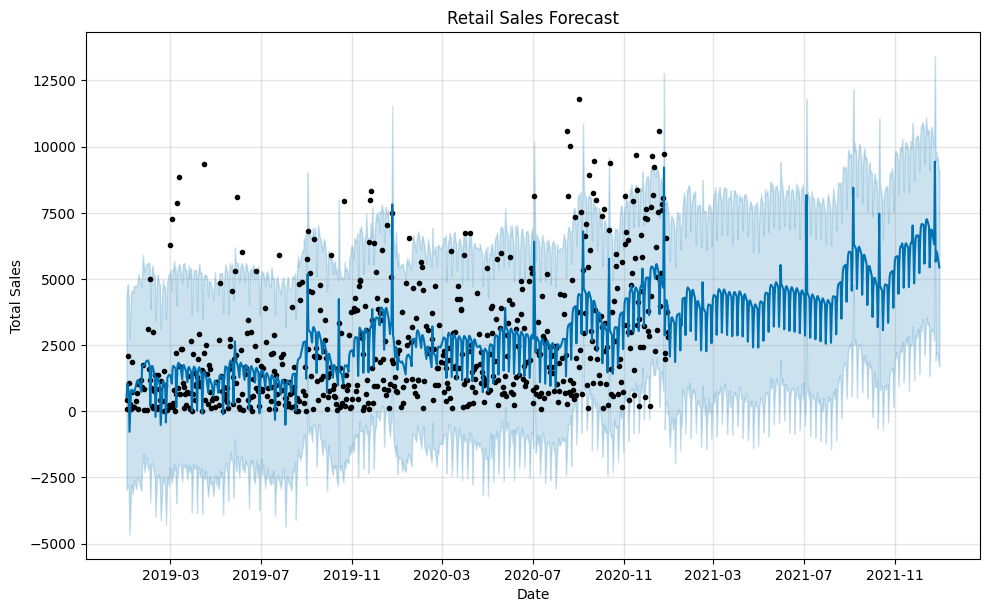

In [4]:
# 1. Initialize and Train Model
# We add US holidays as they significantly impact retail sales
model = Prophet(yearly_seasonality=True, interval_width=0.95)
model.add_country_holidays(country_name='US')
model.fit(prophet_df)

# 2. Create Future Dates (1 Year)
future = model.make_future_dataframe(periods=365)

# 3. Generate Forecast
forecast = model.predict(future)

# 4. Visualize the results
fig1 = model.plot(forecast)
plt.title("Retail Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

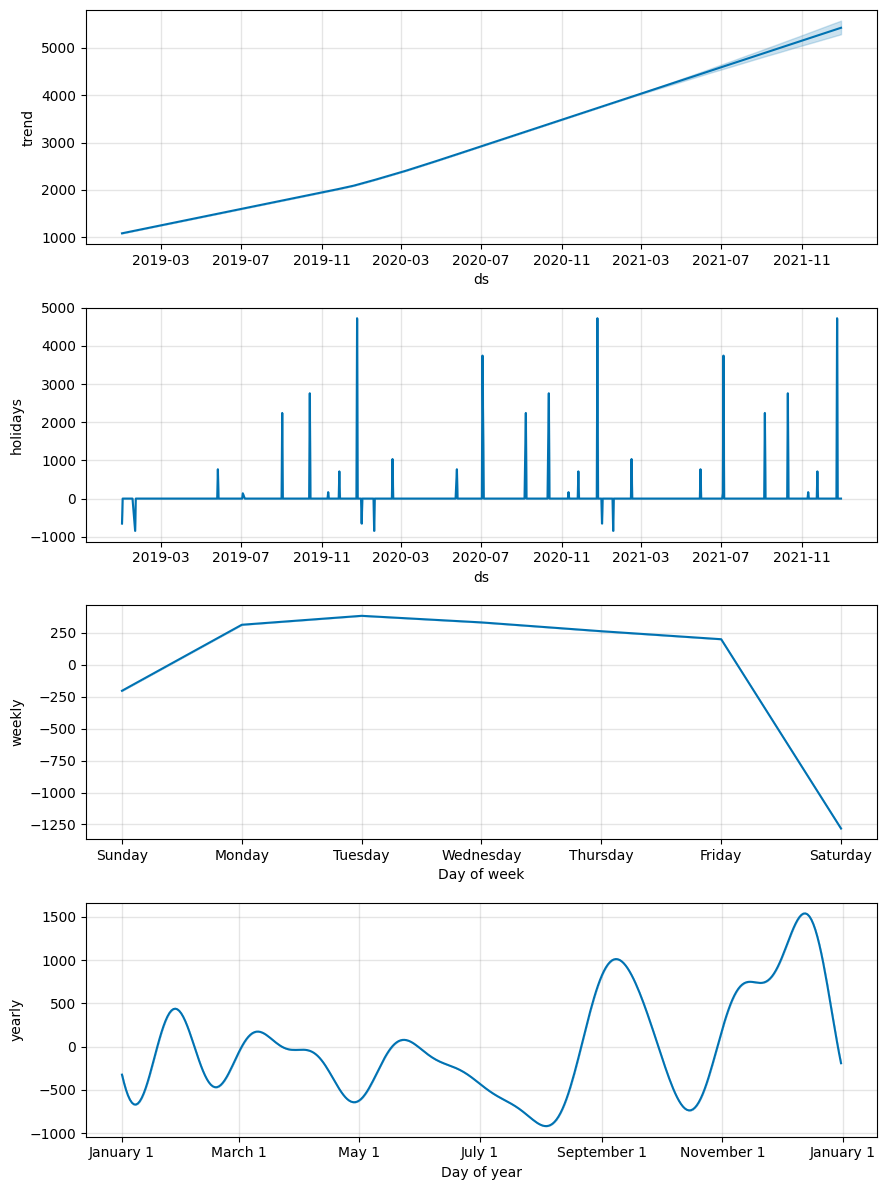

In [6]:
# Visualize seasonality (Weekly/Yearly trends)
fig2 = model.plot_components(forecast)
plt.show()

In [7]:
# 1. Merge actuals and forecast for a complete view
final_table = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(
    prophet_df, on='ds', how='left'
)

# 2. Save to your Google Drive
export_path = '/content/drive/MyDrive/sales_forecast_results_for_powerbi.csv'
final_table.to_csv(export_path, index=False)

print(f"Success! Your forecast is saved at: {export_path}")

Success! Your forecast is saved at: /content/drive/MyDrive/sales_forecast_results_for_powerbi.csv
